<a href="https://colab.research.google.com/github/Quark-hadron/Training-on-different-dates-and-dates/blob/main/extrovert_introvert.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
! pip install category_encoders
! pip install feature_engine

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.impute import SimpleImputer
from sklearn.impute import MissingIndicator
from sklearn.impute import KNNImputer
from sklearn.preprocessing import LabelEncoder, MinMaxScaler, StandardScaler, RobustScaler
from category_encoders import CountEncoder, OrdinalEncoder
from feature_engine.encoding import CountFrequencyEncoder
from sklearn.pipeline import Pipeline
#model

from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier, KNeighborsRegressor, KNeighborsTransformer
from xgboost import XGBClassifier, XGBRegressor

#metrics

from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, mean_squared_error

#neural networks

from keras.models import Sequential
from keras.layers import Dense

In [ ]:
! gdown --id 1qMiLJFTjgnhhPk-Jn73vMpiVcMuZaiKA
! gdown --id 1kstTH4sYnr_uFpCAMUxWzeH_nD8BQyx2
! gdown --id 1M-jdPCndHO-x6qYCCchzUzMQzOaANcL3

/usr/local/lib/python3.12/dist-packages/gdown/__main__.py:140: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From: https://drive.google.com/uc?id=1qMiLJFTjgnhhPk-Jn73vMpiVcMuZaiKA
To: /content/test.csv
100% 195k/195k [00:00<00:00, 93.1MB/s]
/usr/local/lib/python3.12/dist-packages/gdown/__main__.py:140: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From: https://drive.google.com/uc?id=1kstTH4sYnr_uFpCAMUxWzeH_nD8BQyx2
To: /content/train.csv
100% 760k/760k [00:00<00:00, 93.8MB/s]
/usr/local/lib/python3.12/dist-packages/gdown/__main__.py:140: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From: https://drive.google.

In [ ]:
train = pd.read_csv('/content/train.csv')
test  = pd.read_csv('/content/test.csv')
sub = pd.read_csv('/content/sample_submission.csv')

In [ ]:
train_id = train['id']
train.drop('id', axis=1, inplace=True)

In [ ]:
print('train size:  test size:\n')
((train.shape), (test.shape))

train size:  test size:



((18524, 8), (6175, 8))

Время проведения в одном состоянии     ------ Time_spent_Alone

Страх сцены                            ------ Stage_fear

Посещение общественных мероприятий     ------ Social_event_attendance

Выход на улицу                         ------ Going_outside

Истощение после общения                ------ Drained_after_socializing

Размер круга друзей                    ------ Friends_circle_size

Частота постов                         ------ Post_frequency

Личность                               ------ Personality


In [ ]:
train.head()

,Time_spent_Alone,Stage_fear,Social_event_attendance,Going_outside,Drained_after_socializing,Friends_circle_size,Post_frequency,Personality
0,0.0,No,6.0,4.0,No,15.0,5.0,Extrovert
1,1.0,No,7.0,3.0,No,10.0,8.0,Extrovert
2,6.0,Yes,1.0,0.0,NaN,3.0,0.0,Introvert
3,3.0,No,7.0,3.0,No,11.0,5.0,Extrovert
4,1.0,No,4.0,4.0,No,13.0,NaN,Extrovert


In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18524 entries, 0 to 18523
Data columns (total 8 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Time_spent_Alone           17334 non-null  float64
 1   Stage_fear                 16631 non-null  object 
 2   Social_event_attendance    17344 non-null  float64
 3   Going_outside              17058 non-null  float64
 4   Drained_after_socializing  17375 non-null  object 
 5   Friends_circle_size        17470 non-null  float64
 6   Post_frequency             17260 non-null  float64
 7   Personality                18524 non-null  object 
dtypes: float64(5), object(3)
memory usage: 1.1+ MB


In [ ]:
train.isna().sum()

,0
Time_spent_Alone,1190
Stage_fear,1893
Social_event_attendance,1180
Going_outside,1466
Drained_after_socializing,1149
Friends_circle_size,1054
Post_frequency,1264
Personality,0


The signs don't contain many gaps, so we won't delete them because of the gaps.

In [ ]:
print('Percent non-null in Dataframe\n')

percent_mean_train_nan = [round(col, 1) for col in train.isna().mean() * 100]
df_percent_with_target = pd.Series(data=percent_mean_train_nan, index=train.columns)
df_percent = df_percent_with_target.drop(index=df_percent_with_target.index[-1])
df_percent

Percent non-null in Dataframe



,0
Time_spent_Alone,6.4
Stage_fear,10.2
Social_event_attendance,6.4
Going_outside,7.9
Drained_after_socializing,6.2
Friends_circle_size,5.7
Post_frequency,6.8


A good sign we notice here is the dependence: the higher the frequency of posts, the more likely the type is an extrovert, and vice versa if it is an introvert.

In [ ]:
post_pers = pd.crosstab(columns=train['Post_frequency'], index=[train['Personality']])
post_pers

Post_frequency,0.0,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,10.0
Personality,,,,,,,,,,,
Extrovert,59,69,113,1760,1632,1740,1719,1775,1696,1699,660
Introvert,1213,1145,1178,498,56,48,48,52,38,45,17


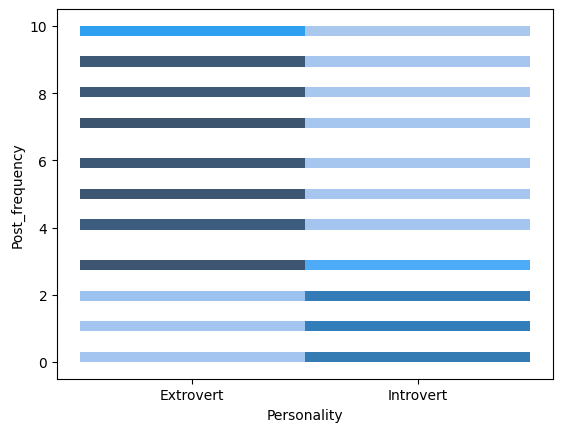

In [ ]:
sns.histplot(data=train, x='Personality', y='Post_frequency').hist;

Another cool feature with some dependence of a person on the number of friends

In [ ]:
friends_pers = pd.crosstab(columns=train['Friends_circle_size'], index=[train['Personality']])
friends_pers

Friends_circle_size,0.0,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,10.0,11.0,12.0,13.0,14.0,15.0
Personality,,,,,,,,,,,,,,,,
Extrovert,28,37,42,105,577,913,1098,1092,1250,1039,1219,1223,1286,1023,1161,906
Introvert,439,716,728,761,740,756,48,32,31,22,48,30,31,25,27,37


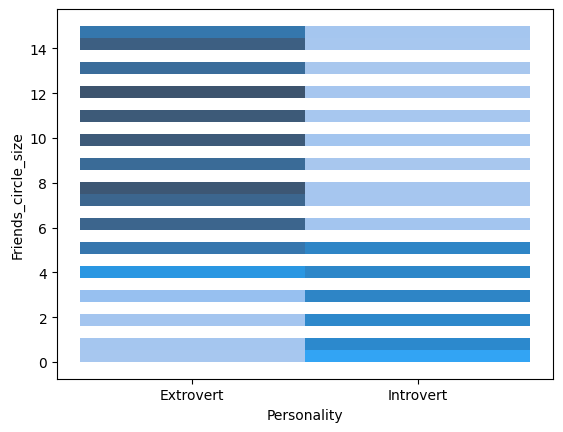

In [ ]:
sns.histplot(data=train, x='Personality', y='Friends_circle_size').hist;

In [ ]:
train['Drained_after_socializing'] = train['Drained_after_socializing'].map({'Yes':1, 'No':0})
train['Stage_fear'] = train['Stage_fear'].map({'Yes':1, 'No':0})
train['Personality'] = train['Personality'].map({'Introvert':1, 'Extrovert':0})

In [ ]:
train['Drained_after_socializing'].value_counts(dropna=False)

,count
Drained_after_socializing,
0.0,13313
1.0,4062
NaN,1149


In [ ]:
train['Stage_fear'].value_counts(dropna=False)

,count
Stage_fear,
0.0,12609
1.0,4022
NaN,1893


We change empty values ​​into classes using the nearest neighbor model

In [ ]:
X = train.drop('Personality', axis=1)

In [ ]:
knni = KNNImputer(n_neighbors=5)
x_knni = knni.fit_transform(X)
df = pd.DataFrame(data=x_knni, columns=X.columns)

In [ ]:
df = pd.DataFrame(data=x_knni, columns=X.columns)
df = df.astype('int64')
df = pd.concat([df, train['Personality']], axis=1)

In [ ]:
df.head()

,Time_spent_Alone,Stage_fear,Social_event_attendance,Going_outside,Drained_after_socializing,Friends_circle_size,Post_frequency,Personality
0,0,0,6,4,0,15,5,0
1,1,0,7,3,0,10,8,0
2,6,1,1,0,1,3,0,1
3,3,0,7,3,0,11,5,0
4,1,0,4,4,0,13,6,0


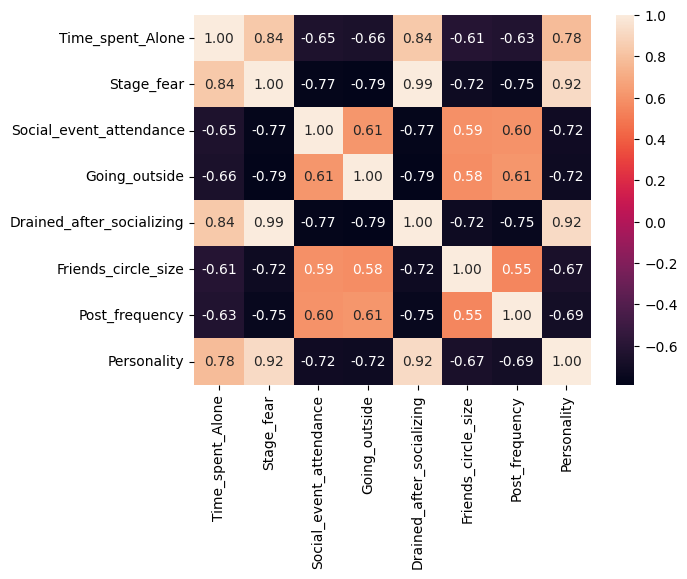

In [ ]:
sns.heatmap(df.corr(), fmt='.2f', annot=True);

In [ ]:
X = df[['Drained_after_socializing', 'Stage_fear', 'Time_spent_Alone']]
y = df['Personality']

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=100)

In [ ]:
pipeline = Pipeline([
    ('rs', RobustScaler()),
    ('knn', KNeighborsRegressor(n_jobs=-1, n_neighbors=15))
])

In [ ]:
pipeline.fit(x_train, y_train)

Pipeline(steps=[('rs', RobustScaler()),
                ('knn', KNeighborsRegressor(n_jobs=-1, n_neighbors=15))])

In [ ]:
y_pred = pipeline.predict(x_test)
y_pred = np.array([int(round(i)) for i in y_pred])

In [ ]:
y_pred

array([0, 0, 1, ..., 1, 0, 1])

In [ ]:
mean_squared_error(y_test, y_pred)

0.032658569500674764

In [ ]:
accuracy_score(y_test, y_pred)

0.9673414304993252

In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.98      0.98      0.98      2769
           1       0.94      0.93      0.94       936

    accuracy                           0.97      3705
   macro avg       0.96      0.96      0.96      3705
weighted avg       0.97      0.97      0.97      3705



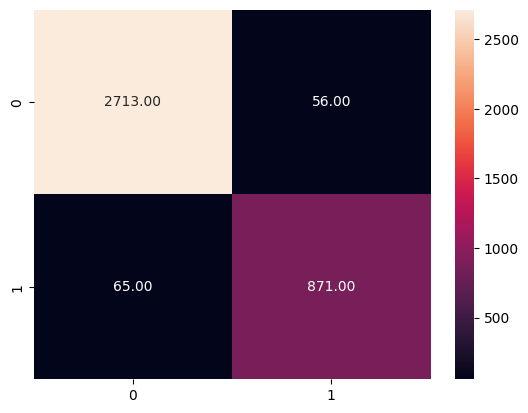

In [ ]:
sns.heatmap(confusion_matrix(y_test, y_pred), fmt='.2f', annot=True);

In [ ]:
y_pred_tr = pipeline.predict(x_train)
y_pred_tr = np.array([int(round(i)) for i in y_pred_tr])

In [ ]:
mean_squared_error(y_train, y_pred_tr)

0.030703826169107228

In [ ]:
print(classification_report(y_train, y_pred_tr))

              precision    recall  f1-score   support

           0       0.98      0.98      0.98     10930
           1       0.95      0.94      0.94      3889

    accuracy                           0.97     14819
   macro avg       0.96      0.96      0.96     14819
weighted avg       0.97      0.97      0.97     14819



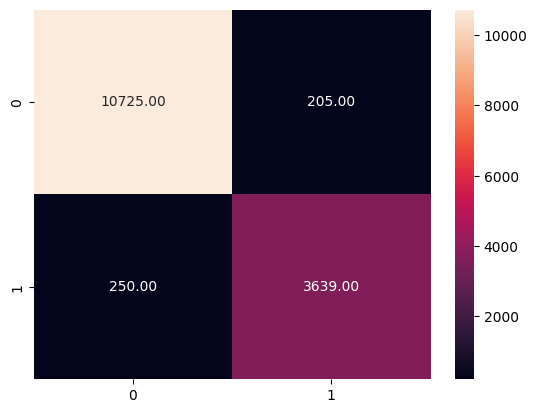

In [ ]:
sns.heatmap(confusion_matrix(y_train, y_pred_tr), fmt='.2f', annot=True);

In [ ]:
X = df.drop(['Drained_after_socializing', 'Stage_fear', 'Personality'], axis=1)
y = df['Personality']

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=330, stratify=y)

In [ ]:
pipeline2 = Pipeline([
    ('rs', RobustScaler()),
    ('knn', KNeighborsClassifier(n_jobs=-1, n_neighbors=15))
])

In [ ]:
pipeline2.fit(x_train, y_train)

Pipeline(steps=[('rs', RobustScaler()),
                ('knn', KNeighborsClassifier(n_jobs=-1, n_neighbors=15))])

In [ ]:
y_pred = pipeline2.predict(x_test)
y_pred = np.array([int(round(i)) for i in y_pred])

In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.98      0.98      0.98      2740
           1       0.93      0.94      0.93       965

    accuracy                           0.97      3705
   macro avg       0.96      0.96      0.96      3705
weighted avg       0.97      0.97      0.97      3705



In [ ]:
accuracy_score(y_test, y_pred)

0.9657219973009447

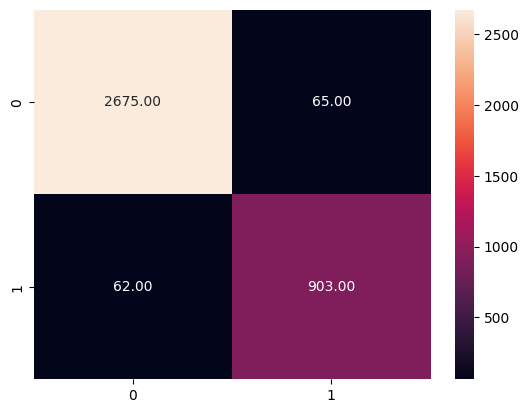

In [ ]:
sns.heatmap(confusion_matrix(y_test, y_pred), fmt='.2f', annot=True);

In [ ]:
X = df.drop('Personality', axis=1)
y = df['Personality']

In [ ]:
RS = RobustScaler()
X = RS.fit_transform(X)

In [ ]:
X

array([[-0.66666667,  0.        ,  0.25      , ...,  0.        ,
         1.16666667,  0.        ],
       [-0.33333333,  0.        ,  0.5       , ...,  0.        ,
         0.33333333,  0.75      ],
       [ 1.33333333,  1.        , -1.        , ...,  1.        ,
        -0.83333333, -1.25      ],
       ...,
       [ 1.66666667,  1.        , -1.        , ...,  1.        ,
        -1.16666667, -1.25      ],
       [ 1.33333333,  1.        , -1.        , ...,  1.        ,
        -0.5       , -0.75      ],
       [-0.33333333,  0.        ,  0.75      , ...,  0.        ,
        -0.66666667,  0.5       ]])

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=322)

In [ ]:
model = Sequential()
model.add(Dense(64, activation='relu', input_dim=7))
model.add(Dense(1, activation='sigmoid'))
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model.fit(x_train, y_train, epochs=100, batch_size=32)

Epoch 1/100


/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


464/464 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9035 - loss: 0.3440
Epoch 2/100
464/464 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9698 - loss: 0.1386
Epoch 3/100
464/464 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9672 - loss: 0.1389
Epoch 4/100
464/464 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9698 - loss: 0.1302
Epoch 5/100
464/464 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9713 - loss: 0.1229
Epoch 6/100
464/464 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9681 - loss: 0.1344
Epoch 7/100
464/464 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9659 - loss: 0.1426
Epoch 8/100
464/464 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9674 - loss: 0.1352
Epoch 9/100
464/464 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9705 - loss: 0.1245
Epoch 10/100
464/464 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9687 - loss: 0.1310
Epoch 11/100
464/464 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9707 - loss: 0.1247
Epoch 12/100
464/464 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step

In [ ]:
 y_predict = model.predict(x_test)

116/116 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


In [ ]:
y_pred = [int(round(i[0])) for i in y_predict]

In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.98      0.98      0.98      2721
           1       0.94      0.95      0.94       984

    accuracy                           0.97      3705
   macro avg       0.96      0.96      0.96      3705
weighted avg       0.97      0.97      0.97      3705



0.9705802968960864

In [ ]:
accuracy_score(y_test, y_pred)

0.9705802968960864

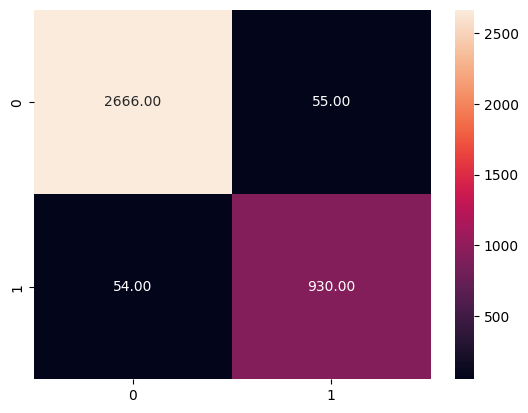

In [ ]:
sns.heatmap(confusion_matrix(y_test, y_pred), fmt='.2f', annot=True);